In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.integrate import odeint

Prepare the simulation algorithm:

In [2]:
# nonlinear function f
def f(h, c):
    h1 = np.empty(np.shape(h))
    h1[h < c] = h[h < c]
    h1[h >= c] = c
    return h1

# evolution of the hypergraph over a step t_step
def evolution(x, I, f, c, tau, gamma, t_step):
    inf_rate = tau*(np.dot(I, f(np.dot(np.transpose(I), x), c)))
    r = np.random.rand(np.size(x))
    new_x = np.empty(np.shape(x))
    
    i_inf = x.astype(bool) # Boolean array with value True if node is infected
    
    i_sus = (x-1).astype(bool) # Boolean array with value True if node is susc.
    
    # assign new susceptible and infected nodes (see Materials and Methods)
    new_x[i_sus] = (r[i_sus] < 1 - np.exp(-inf_rate[i_sus]*t_step)).astype(int)
    new_x[i_inf] = (r[i_inf] >= 1 - np.exp(-gamma*t_step)).astype(int)
    
    return new_x

# perform a single simulation
def routine(I, steps, c):
    x = np.zeros(500)
    x[np.random.randint(0, 500)] = 1 # randomly infect one node
    inf = np.ones(steps) # array with the number of infected at all time steps
    
    # simulate and assign number of infect at each time
    for i in range(1, steps):
        x = evolution(x, I, f, c, 0.18, 1, 0.1)
        inf[i] = np.sum(x)
        
    return inf

Generate bi-uniform hypernetwork:

In [3]:
I_bi = np.zeros((500, 175))

def partition(I, hedge_size, startpoint):
    index_list = np.arange(I.shape[0])
    np.random.shuffle(index_list)
    for i in range(I.shape[0]//hedge_size):
        
        # assign nodes to hyperedges
        I[index_list[i*hedge_size : (i+1)*hedge_size], startpoint + i] = 1
        
    return I

I_bi = partition(I_bi, 4, 0) # H = 4
I_bi = partition(I_bi, 10, 125) # W = 10

Produce plot for the bi-uniform hypernetwork, with different values of $c$:

379 409 441


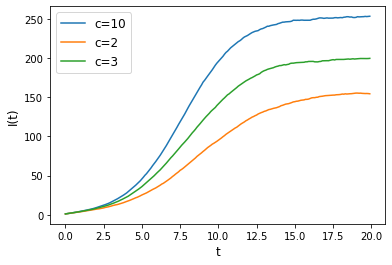

In [4]:
# we intend to run the simulation until t=20
a = np.zeros(200)
b = np.zeros(200)
c = np.zeros(200)

# initialise count of healthy outcomes
zerocount_a = 0
zerocount_b = 0
zerocount_c = 0

# average over 500 simulations
i = 0
while i < 500:
    a_i = routine(I_bi, 200, c=10)
    if a_i[199] != 0:
        i += 1
        a += a_i/500
    else:
        zerocount_a +=1
        
i = 0
while i < 500:
    b_i = routine(I_bi, 200, c=2)
    if b_i[199] != 0:
        i += 1
        b += b_i/500
    else:
        zerocount_b +=1
        
i = 0
while i < 500:
    c_i = routine(I_bi, 200, c=3)
    if c_i[199] != 0:
        i += 1
        c += c_i/500
    else:
        zerocount_c +=1

print(zerocount_a, zerocount_b, zerocount_c) # count of healthy outcomes

t = np.arange(0, 20, 0.1)
plt.plot(t, a)
plt.plot(t, b)
plt.plot(t, c)
plt.xlabel('t', fontsize='large')
plt.ylabel('I(t)', fontsize='large')
plt.legend(['c=10','c=2','c=3'], fontsize='large')
plt.savefig('bi, effect of c')

Generate Barabasi Albert hypernetwork:

In [5]:
G = nx.barabasi_albert_graph(500, 8)
cliques = list(nx.find_cliques(G))

# initialise incidence matrix
I_BA = np.zeros((500, len(cliques)))

# assign nodes to hyperedges
for i in range(len(cliques)):
    I_BA[np.array(cliques[i]), i] = 1

Produce plot for the Barabasi Albert hypernetwork, with different values of $c$:

174 206 175


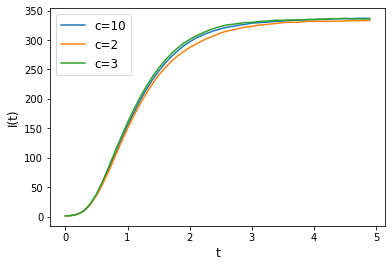

In [6]:
# we intend to run the simulation until t=5
a = np.zeros(50)
b = np.zeros(50)
c = np.zeros(50)

# initialise count of healthy outcomes
zerocount_a = 0
zerocount_b = 0
zerocount_c = 0
i = 0

# average over 500 simulations
while i < 500:
    a_i = routine(I_BA, 50, c=10)
    if a_i[49] != 0:
        i += 1
        a += a_i/500
    else:
        zerocount_a +=1
        
i = 0
while i < 500:
    b_i = routine(I_BA, 50, c=2)
    if b_i[49] != 0:
        i += 1
        b += b_i/500
    else:
        zerocount_b +=1
        
i = 0
while i < 500:
    c_i = routine(I_BA, 50, c=3)
    if c_i[49] != 0:
        i += 1
        c += c_i/500
    else:
        zerocount_c +=1

print(zerocount_a, zerocount_b, zerocount_c) # count of healthy outcomes

t = np.arange(0, 5, 0.1)
plt.plot(t, a)
plt.plot(t, b)
plt.plot(t, c)
plt.xlabel('t', fontsize='large')
plt.ylabel('I(t)', fontsize='large')
plt.legend(['c=10','c=2','c=3'], fontsize='large')
plt.savefig('BA, effect of c')

Compare the two networks' connectivity:

In [7]:
print(np.shape(I_BA)[1])
print(np.shape(I_bi)[1])

3029
175


Produce a second bi-normal hypergraph:

In [8]:
I_bi1 = np.zeros((500, 100))

def partition(I, hedge_size, startpoint):
    index_list = np.arange(I.shape[0])
    np.random.shuffle(index_list)
    for i in range(I.shape[0]//hedge_size):
        I[index_list[i*hedge_size : (i+1)*hedge_size], startpoint + i] = 1
    return I

I_bi1 = partition(I_bi1, 10, 0) # H = 10
I_bi1 = partition(I_bi1, 10, 50) # W = 10

Run simulations on the two bi-normal networks:

In [9]:
# we intend to run the simulation until t=20
a = np.zeros(200)
a1 = np.zeros(200)

# average over 500 simulations
i = 0
while i < 500:
    a_i = routine(I_bi, 200, c=3)
    if a_i[199] != 0:
        i += 1
        a += a_i/500
i=0        
while i < 500:
    a1_i = routine(I_bi1, 200, c=3)
    if a1_i[199] != 0:
        i += 1
        a1 += a1_i/500

Predict time evolution of infected nodes with mean-field equation:

In [10]:
# dI/dt = func
def func(y, t, H, W):
    return 0.18*(500-y)*[f((H-1)*y/500, 3)[0]+f((W-1)*y/500, 3)[0]]-y

# integrate until time t=20 with initial value 1
t = np.arange(0, 20, 0.1)
b = odeint(func, 1, t, args=(4,10)) # H = 4, W = 10
b1 = odeint(func, 1, t, args=(10,10)) # H = 10, W = 10

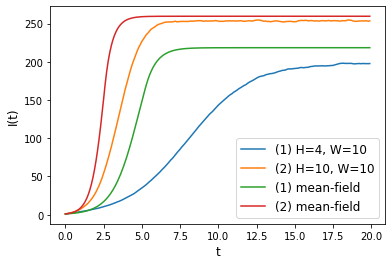

In [11]:
plt.plot(t, a)
plt.plot(t, a1)
plt.plot(t, b)
plt.plot(t, b1)
plt.xlabel('t', fontsize='large')
plt.ylabel('I(t)', fontsize='large')
plt.legend(['(1) H=4, W=10','(2) H=10, W=10','(1) mean-field', '(2) mean-field'], fontsize='large')
plt.savefig('bi, mean')